#Kathy Deng (7116596974)

#Brief comments in .ipynb
#Full explanations in PDF
#Some numbers may differ due to random train/test splitting

#1b: Explore the Data

(9568, 5)


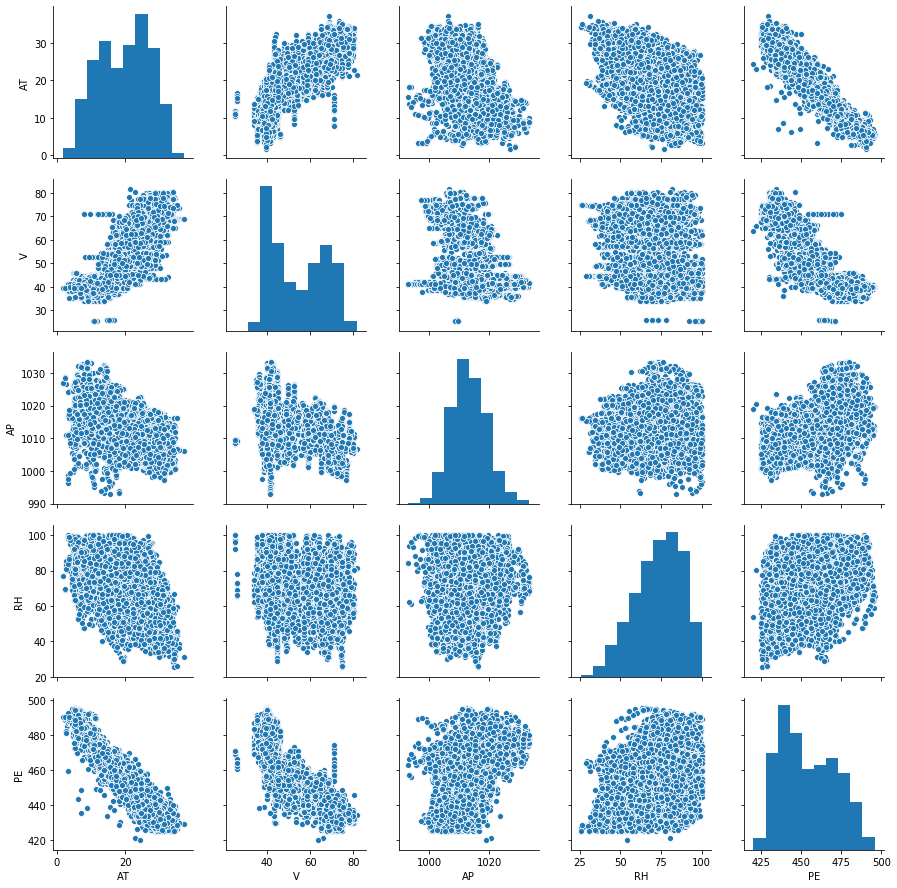


Mean:
 AT      19.651231
V       54.305804
AP    1013.259078
RH      73.308978
PE     454.365009
dtype: float64

Median:
 AT      20.345
V       52.080
AP    1012.940
RH      74.975
PE     451.550
dtype: float64

Range:
 AT    35.30
V     56.20
AP    40.41
RH    74.60
PE    75.50
dtype: float64

1st and 3rd Quartiles:
          AT      V       AP       RH      PE
0.25  13.51  41.74  1009.10  63.3275  439.75
0.75  25.72  66.54  1017.26  84.8300  468.43

Interquartile Range:
 AT    12.2100
V     24.8000
AP     8.1600
RH    21.5025
PE    28.6800
dtype: float64


In [66]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#Get rows and columns
power_df = pd.read_excel('/Users/kathydeng/Desktop/4th Year Fall Semester/INF 552/HW2/Folds5x2_pp.xlsx')
print(power_df.shape)

#Pairwise scatterplots
sns.pairplot(power_df)
plt.show()

#Get stats of each variable
print("\nMean:\n", power_df.mean())
print("\nMedian:\n", power_df.median())
print("\nRange:\n", power_df.max()-power_df.min())
print("\n1st and 3rd Quartiles:\n",power_df.quantile([0.25,0.75]))
print("\nInterquartile Range:\n", power_df.quantile(0.75)-power_df.quantile(0.25))

#1c: Fit a Simple Linear Regression Model

AT
Intercept:  [496.9725508]
Slope:  [[-2.16993107]]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Thu, 26 Sep 2019   Prob (F-statistic):               0.00
Time:                        21:42:09   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

/Users/kathydeng/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


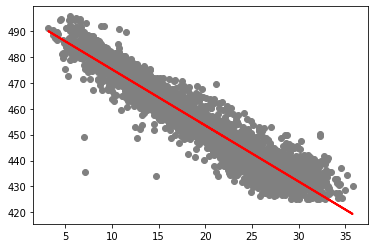

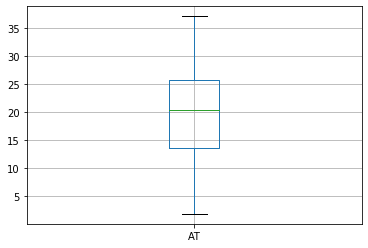

V
Intercept:  [517.44541302]
Slope:  [[-1.16300776]]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.972e+04
Date:                Thu, 26 Sep 2019   Prob (F-statistic):               0.00
Time:                        21:42:10   Log-Likelihood:                -33963.
No. Observations:                9568   AIC:                         6.793e+04
Df Residuals:                    9566   BIC:                         6.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

/Users/kathydeng/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


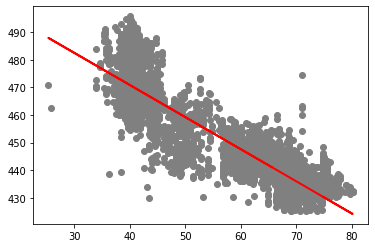

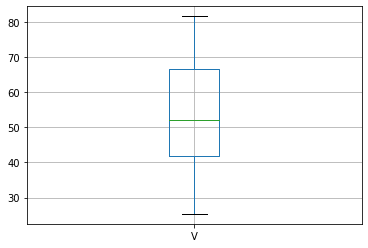

AP
Intercept:  [-1046.06445487]
Slope:  [[1.48075945]]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3516.
Date:                Thu, 26 Sep 2019   Prob (F-statistic):               0.00
Time:                        21:42:10   Log-Likelihood:                -39224.
No. Observations:                9568   AIC:                         7.845e+04
Df Residuals:                    9566   BIC:                         7.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

/Users/kathydeng/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


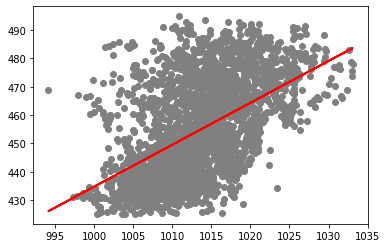

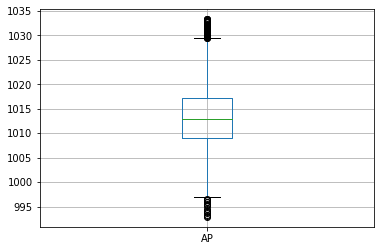

RH
Intercept:  [421.24546607]
Slope:  [[0.4515943]]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1714.
Date:                Thu, 26 Sep 2019   Prob (F-statistic):               0.00
Time:                        21:42:10   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9566   BIC:                         7.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


/Users/kathydeng/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


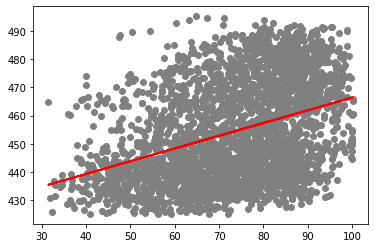

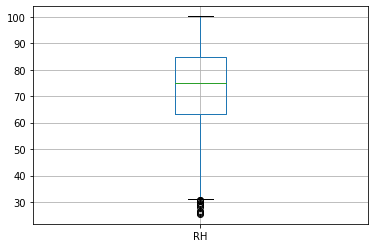

In [99]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import Normalizer
from sklearn import metrics
from math import sqrt

#For each predictor, fit a simple linear regression to predict the response
predictorList = ['AT', 'V', 'AP', 'RH']
linCoef = []
for predictor in predictorList:
    #Separate predictor and label
    x = power_df[predictor].values.reshape(-1,1)
    y = power_df['PE'].values.reshape(-1,1)

    #Split data into training and test sets
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

    #Train the model and see slope and coefficient
    regressor = LinearRegression()
    regressor.fit(x_train, y_train)
    print(predictor)
    print("Intercept: ", regressor.intercept_)
    print("Slope: ", regressor.coef_)
    linCoef.append(float(regressor.coef_[0]))

    #Make predictions using test data
    y_pred = regressor.predict(x_test)

    #Look at p-value to check for significant association
    X = sm.add_constant(power_df[predictor])
    model = sm.OLS(y, X).fit()
    pred = model.predict(X)
    print(model.summary())
    
    #Plot results
    plt.scatter(x_test, y_test,  color='gray')
    plt.plot(x_test, y_pred, color='red', linewidth=2)
    plt.show()
    
    #Look for outliers with boxplot
    power_df.loc[:,[predictor]].boxplot()
    plt.show()

#1d: Fit a Multiple Regression Model

In [107]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt 
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import neighbors
from sklearn.metrics import r2_score
%matplotlib inline

#Separate predictors and labels
x = power_df[predictorList].values
y = power_df['PE'].values

#Split data into training and test data sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

#Train the model and see slope
regressor = LinearRegression()  
model = regressor.fit(x_train, y_train)
slopeTable = pd.DataFrame(regressor.coef_, predictorList, columns = ['Slope'])
print(slopeTable)

multCoef = slopeTable['Slope'].values

#Make predictions using test data
y_pred = regressor.predict(x_test)

#Hypothesis testing
X = sm.add_constant(power_df[predictorList])
model = sm.OLS(y, X).fit()
pred = model.predict(X)
print(model.summary())

#Calculate RMSE
testError = sqrt(mean_squared_error(y_test,pred_test))
print("\nBest RMSE Test Error: ", min(rmse_test))

       Slope
AT -1.975775
V  -0.232436
AP  0.061040
RH -0.160910
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Thu, 26 Sep 2019   Prob (F-statistic):               0.00
Time:                        23:28:35   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

/Users/kathydeng/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


#1e: Regression Coefficients

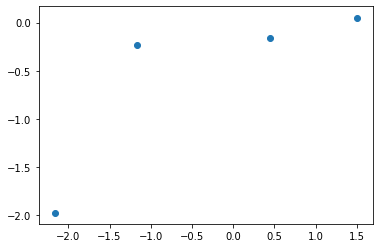

In [69]:
x = linCoef
y = multCoef
plt.scatter(x,y, marker='o')

#1f: Evidence of Nonlinear Association

In [70]:
y = power_df[['PE']].values

#Test AT
regression = LinearRegression()
cubic = PolynomialFeatures(degree=3)
x_at = power_df[['AT']].values
x_at_cubic = cubic.fit_transform(x_at)
regression = regression.fit(x_at,y)

#Check if feature is significant
ols_at = sm.OLS(y,x_at_cubic).fit()
pred = ols_at.predict(x_at_cubic)
print("AT:\n",ols_at.summary())

#Check if better model with R2
lin_r2 = r2_score(y, regression.predict(x_at))
print("\nLinear R^2: ", lin_r2)

regression = regression.fit(x_at_cubic,y)
cubic_r2 = r2_score(y, regression.predict(x_at_cubic))
print("Cubic R^2: ", cubic_r2, "\n")

#Test V
regression = LinearRegression()
cubic = PolynomialFeatures(degree=3)
x_v = power_df[['V']].values
x_v_cubic = cubic.fit_transform(x_v)
regression = regression.fit(x_v,y)

ols_v = sm.OLS(y,x_v_cubic).fit()
pred = ols_v.predict(x_v_cubic)
print("V:\n",ols_v.summary())

#Check if better model with R2
lin_r2 = r2_score(y, regression.predict(x_v))
print("\nLinear R^2: ", lin_r2)

regression = regression.fit(x_v_cubic,y)
cubic_r2 = r2_score(y, regression.predict(x_v_cubic))
print("Cubic R^2: ", cubic_r2, "\n")

#Test AP
regression = LinearRegression()
cubic = PolynomialFeatures(degree=3)
x_ap = power_df[['AP']].values
x_ap_cubic = cubic.fit_transform(x_ap)
regression = regression.fit(x_ap,y)

ols_ap = sm.OLS(y,x_ap_cubic).fit()
pred = ols_ap.predict(x_ap_cubic)
print("AP:\n",ols_ap.summary())

#Check if better model with R2
lin_r2 = r2_score(y, regression.predict(x_ap))
print("\nLinear R^2: ", lin_r2)

regression = regression.fit(x_ap_cubic,y)
cubic_r2 = r2_score(y, regression.predict(x_ap_cubic))
print("Cubic R^2: ", cubic_r2, "\n")

#Test RH
regression = LinearRegression()
cubic = PolynomialFeatures(degree=3)
x_rh = power_df[['RH']].values
x_rh_cubic = cubic.fit_transform(x_rh)
regression = regression.fit(x_rh,y)

ols_rh = sm.OLS(y,x_rh_cubic).fit()
pred = ols_rh.predict(x_rh_cubic)
print("RH:\n",ols_rh.summary())

#Check if better model with R2
lin_r2 = r2_score(y, regression.predict(x_rh))
print("\nLinear R^2: ", lin_r2)

regression = regression.fit(x_rh_cubic,y)
cubic_r2 = r2_score(y, regression.predict(x_rh_cubic))
print("Cubic R^2: ", cubic_r2, "\n")

AT:
                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Thu, 26 Sep 2019   Prob (F-statistic):               0.00
Time:                        17:11:23   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        492.7281      0.673    732.248    

#1g: Association of Interactions of Predictors with the Response

In [71]:
x = power_df[['AT', 'V', 'AP', 'RH']]
regression = LinearRegression()
regression = smf.ols('PE ~ AT + V + AP + RH + AT*V + AT*AP + AT*RH + V*AP + V*RH + AP*RH', data=power_df).fit()
print(regression.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Thu, 26 Sep 2019   Prob (F-statistic):               0.00
Time:                        17:11:24   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    685.7825     78.640      8.721      0.0

#1h: Regression Models with Interaction Terms

In [100]:
#Train the regression model on a randomly selected 70% subset of the data with all predictors
x = power_df[['AT', 'AP', 'RH', 'V']]
y = power_df['PE']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
regression  = LinearRegression()
regression = regression.fit(x_train, y_train)
y_pred_test = regression.predict(x_test)
y_pred_train = regression.predict(x_train)

#Report test and train MSEs
mse_test = mean_squared_error(y_test, y_pred_test)
print("Test MSE: ", mse_test)
mse_train = mean_squared_error(y_train, y_pred_train)
print("Train MSE: ", mse_train)

#Run a regression model involving all interaction terms/quadratic nonlinearities
power_df_temp = pd.read_excel('/Users/kathydeng/Desktop/4th Year Fall Semester/INF 552/HW2/Folds5x2_pp.xlsx')

#Quadratic nonlinearities
power_df_temp['AT*AT'] = power_df_temp['AT']*power_df_temp['AT']
power_df_temp['V*V'] = power_df_temp['V']*power_df_temp['V']
power_df_temp['AP*AP'] = power_df_temp['AP']*power_df_temp['AP']
power_df_temp['RH*RH'] = power_df_temp['RH']*power_df_temp['RH']

#Interaction terms
power_df_temp['AT*V'] = power_df_temp['AT']*power_df_temp['V']
power_df_temp['AT*AP'] = power_df_temp['AT']*power_df_temp['AP']
power_df_temp['AT*RH'] = power_df_temp['AT']*power_df_temp['RH']
power_df_temp['V*AP'] = power_df_temp['V']*power_df_temp['AP']
power_df_temp['V*RH'] = power_df_temp['V']*power_df_temp['RH']
power_df_temp['AP*RH'] = power_df_temp['AP']*power_df_temp['RH']

x = power_df_temp[['AT', 'V','AP', 'RH', 'AT*AT', 'V*V', 'AP*AP', 'RH*RH', 'AT*V', 'AT*AP', 'AT*RH', 'V*AP', 'V*RH', 'AP*RH']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
regression  = LinearRegression()
regression = regression.fit(x_train, y_train)
y_pred_test = regression.predict(x_test)
y_pred_train = regression.predict(x_train)

ols_lin = sm.OLS(y,x).fit()
pred = ols_lin.predict(x)
print("All Interaction Terms/Quadratic Nonlinearities:\n",ols_lin.summary())

#Remove insignificant variables with p values > 0.05 and train model
x = power_df_temp[['AT', 'AP', 'RH', 'AT*AT', 'AP*AP', 'RH*RH', 'AT*V', 'AT*AP', 'AT*RH', 'AP*RH']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
regression  = LinearRegression()
regression = regression.fit(x_train, y_train)
y_pred_test = regression.predict(x_test)
y_pred_train = regression.predict(x_train)

ols_lin = sm.OLS(y,x).fit()
pred = ols_lin.predict(x)
print("Without Insignificant Variables:\n",ols_lin.summary())

#Report test and train MSEs
mse_test = mean_squared_error(y_test, y_pred_test)
print("Test MSE: ", mse_test)
mse_train = mean_squared_error(y_train, y_pred_train)
print("Train MSE: ", mse_train)

Test MSE:  19.236172196653875
Train MSE:  21.425007919553533
All Interaction Terms/Quadratic Nonlinearities:
                                  OLS Regression Results                                
Dep. Variable:                     PE   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          7.761e+06
Date:                Thu, 26 Sep 2019   Prob (F-statistic):                        0.00
Time:                        22:57:41   Log-Likelihood:                         -27451.
No. Observations:                9568   AIC:                                  5.493e+04
Df Residuals:                    9554   BIC:                                  5.503e+04
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
          

#1i: KNN Regression

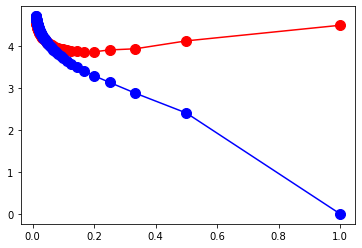

Best k:  5  Best Test Error:  3.867949280659828


In [103]:
#Raw features
x = power_df[['AT', 'V', 'AP', 'RH']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
rmse_test = []
rmse_train = []
kVal = []
for k in range(1,101,1):
    kVal.append(1/k)
for k in range(1,101,1):
    knnModel = neighbors.KNeighborsRegressor(n_neighbors = k)
    knnModel.fit(x_train, y_train)
    pred_test = knnModel.predict(x_test)
    pred_train = knnModel.predict(x_train)

    #Calculate RMSE
    testError = sqrt(mean_squared_error(y_test,pred_test))
    trainError = sqrt(mean_squared_error(y_train,pred_train))
    rmse_test.append(testError)
    rmse_train.append(trainError)

plt.plot(kVal, rmse_test, color='red', marker='o', markersize=10)
plt.plot(kVal, rmse_train, color='blue', marker='o', markersize=10)
plt.show()

print("Best k: ", rmse_test.index(min(rmse_test))+1, " Best Test Error: ", min(rmse_test))

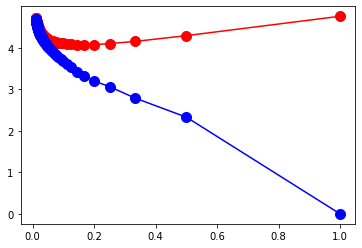

Best k:  7  Best Test Error:  4.0661941236526395


In [104]:
#Normalized features
x = power_df[['AT', 'V', 'AP', 'RH']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
normal = Normalizer()
normal.fit(x_train)
normal.transform(x_train)  
normal.transform(x_test)

rmse_test = []
rmse_train = []
kVal = []
for k in range(1,101,1):
    kVal.append(1/k)
for k in range(1,101,1):
    knnModel = neighbors.KNeighborsRegressor(n_neighbors = k)
    knnModel.fit(x_train, y_train)
    pred_test = knnModel.predict(x_test)
    pred_train = knnModel.predict(x_train)

    #Calculate RMSE
    testError = sqrt(mean_squared_error(y_test,pred_test))
    trainError = sqrt(mean_squared_error(y_train,pred_train))
    rmse_test.append(testError)
    rmse_train.append(trainError)

plt.plot(kVal, rmse_test, color='red', marker='o', markersize=10)
plt.plot(kVal, rmse_train, color='blue', marker='o', markersize=10)
plt.show()

print("Best k: ", rmse_test.index(min(rmse_test))+1, " Best Test Error: ", min(rmse_test))

#1j: Compare KNN Regression with Best Linear Regression

Answered in PDF

#7a: Calculate Euclidean Distance

In [4]:
import numpy as np
obs_one = np.array((0,3,0))
obs_two = np.array((2,0,0))
obs_three = np.array((0,1,3))
obs_four = np.array((0,1,2))
obs_five = np.array((-1,0,1))
obs_six = np.array((1,1,1))
testPoint = np.array((0,0,0))

print("Euclidean Distance for Observation 1: ", np.linalg.norm(obs_one-testPoint))
print("Euclidean Distance for Observation 2: ", np.linalg.norm(obs_two-testPoint))
print("Euclidean Distance for Observation 3: ", np.linalg.norm(obs_three-testPoint))
print("Euclidean Distance for Observation 4: ", np.linalg.norm(obs_four-testPoint))
print("Euclidean Distance for Observation 5: ", np.linalg.norm(obs_five-testPoint))
print("Euclidean Distance for Observation 6: ", np.linalg.norm(obs_six-testPoint))

Euclidean Distance for Observation 1:  3.0
Euclidean Distance for Observation 2:  2.0
Euclidean Distance for Observation 3:  3.1622776601683795
Euclidean Distance for Observation 4:  2.23606797749979
Euclidean Distance for Observation 5:  1.4142135623730951
Euclidean Distance for Observation 6:  1.7320508075688772


#7b: Prediction with K=1

Observation 5 is the nearest neighbor (K=1) because its Euclidean distance is the smallest
Observation 5 has an output of Green, so the prediction is that with K=1, the test point will also be Green

#7C: Prediction with K=3

Observations 5, 6, and 2 are the 3 nearest neighbors because their Euclidean distances are the smallest
Observation 5 has an output of Green, Observation 6 has an output of Red, and Observation 2 has an output of Red.
Because the majority is Red, then the prediction with K=3 is that the test point will also be Red

#7D: Best K Value

The best k value should be small because as k increases, the boundary becomes inflexible and more linear. Since the Bayes boundary in this problem is highly nonlinear, the best k value would be small to maintain its flexibility.